<a href="https://colab.research.google.com/github/valren-enforcer/ML-Internship/blob/main/SinghWalmartSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Walmart_Sales.csv')

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
df['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [ ]:
df.drop(['Date'], axis=1, inplace=True)

In [ ]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 352.0 KB


In [ ]:
y = df['Weekly_Sales'].values

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y.shape

(6435,)

In [ ]:
y[:5]

array([ 1643690.900,  1641957.440,  1611968.170,  1409727.590,
        1554806.680])

In [ ]:
y_scaled = y/100000

In [ ]:
y_scaled

array([ 16.437,  16.420,  16.120, ...,  7.345,  7.181,  7.603])

In [ ]:
X = df.iloc[:, [0,2,3,4,5,6]].values

(array([ 2264.000,  882.000,  0.000,  0.000,  0.000,  168.000,  538.000,
         331.000,  1361.000,  891.000]),
 array([ 126.064,  136.181,  146.298,  156.415,  166.532,  176.648,
         186.765,  196.882,  206.999,  217.116,  227.233]),
 <BarContainer object of 10 artists>)

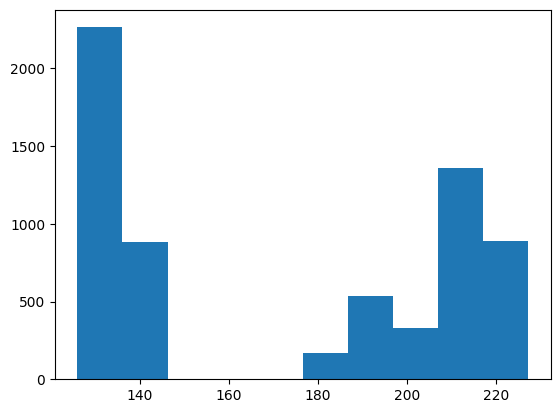

In [ ]:
plt.hist(X[:, 4])

In [ ]:
x = X.copy()

In [ ]:
cpi_norm = np.linalg.norm(X[:, 4]) # root of sum of squares

In [ ]:
x[:, 4] = x[:, 4] / cpi_norm

In [ ]:
x[:5]

array([[ 1.000,  0.000,  42.310,  2.572,  0.015,  8.106],
       [ 1.000,  1.000,  38.510,  2.548,  0.015,  8.106],
       [ 1.000,  0.000,  39.930,  2.514,  0.015,  8.106],
       [ 1.000,  0.000,  46.630,  2.561,  0.015,  8.106],
       [ 1.000,  0.000,  46.500,  2.625,  0.015,  8.106]])

In [ ]:
rows = X.shape[0]

In [ ]:
#X_new = np.hstack(((np.ones((rows,1))), x))# Adding one more column for bias
X_new = x.copy()

In [ ]:
X_new.shape

(6435, 6)

In [ ]:
np.random.seed(42) # Let's set the zero for time being
theta = np.random.randn(1,X_new.shape[1]) # Setting values of theta randomly

In [ ]:
theta.shape

(1, 6)

In [ ]:
theta

array([[ 0.497, -0.138,  0.648,  1.523, -0.234, -0.234]])

In [ ]:
y_hat = np.dot(X_new, theta.T)

In [ ]:
y_hat.shape

(6435, 1)

In [ ]:
y_hat[:5]

array([[ 29.916],
       [ 27.280],
       [ 28.286],
       [ 32.697],
       [ 32.711]])

In [ ]:
error = y_hat.ravel() - y_scaled

In [ ]:
error.shape

(6435,)

In [ ]:
error.reshape(1,rows).shape

(1, 6435)

In [ ]:
error[:5]

array([ 60.556,  55.439,  57.262,  69.478,  67.814])

In [ ]:
squared_error = error ** 2

In [ ]:
squared_error_sum = np.sum(squared_error)

In [ ]:
squared_error_sum

59000407.63639484

In [ ]:
1/(2 * rows) * squared_error_sum

4584.336257684137

In [ ]:
update = ((learning_rate/rows) * np.dot(error.reshape(1,rows), X))

In [ ]:
update.ravel()

array([ 6.292,  0.016,  18.175,  0.923,  47.483,  2.221])

In [ ]:
import matplotlib.pyplot as plt # data plotting

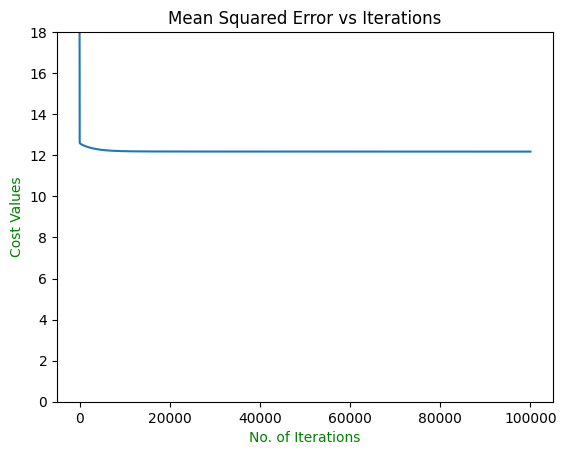

In [ ]:
theta = np.random.randn(1,X_new.shape[1]) # Setting values of theta randomly

iteration = 100000
learning_rate = 0.0003
J = np.zeros(iteration)

# Let's train our model to compute values of theta
for i in range(iteration):
    # the predicted value is what we call y_hat
    y_hat = np.dot(X_new, theta.T)
    # the residue, or the error term is difference between what the
    # prediction was and what the true value is
    error = y_hat.ravel() - y_scaled
    # we square the error (MSE) - why?
    squared_error = error ** 2
    # now we sum up the error across all samples
    squared_error_mean = np.mean(np.sum(squared_error))
    # we take the mean of this accumulated error
    J[i] = squared_error_mean
    # this is the update rule -
    # we correct our estimate (theta) by a small faction of the gradient
    # gradient caclulation requires calculus - the
    update = ((learning_rate/rows) * np.dot(error.reshape(1,rows), X))
    theta -= update.ravel()

prediction = np.round(np.dot(X_new, theta.T))

ax = plt.subplot(111)
ax.plot(np.arange(iteration), np.log(J))
ax.set_ylim([0,int(np.max(np.log(J)))])
plt.ylabel("Cost Values", color="Green")
plt.xlabel("No. of Iterations", color="Green")
plt.title("Mean Squared Error vs Iterations")
plt.show()

In [ ]:
theta

array([[-0.137,  0.955, -0.010,  2.994,  117.232,  0.319]])

In [ ]:
J[:-10]

array([ 77596866.112,  11590633.511,  2066024.754, ...,  195124.579,
        195124.577,  195124.576])

In [ ]:
mse = np.sum(np.sqrt((prediction - y_hat)**2)/float(len(y_scaled)) * 100)
print("The model predicted values of Walmart dataset with an overall MSE of %s" % (mse))

The model predicted values of Walmart dataset with an overall MSE of 24.824062456103714


In [ ]:
prediction

array([[ 11.000],
       [ 12.000],
       [ 11.000],
       ...,
       [ 10.000],
       [ 9.000],
       [ 9.000]])

In [ ]:
y_scaled

array([ 16.437,  16.420,  16.120, ...,  7.345,  7.181,  7.603])

In [ ]:
differences = np.abs(prediction - y_scaled)

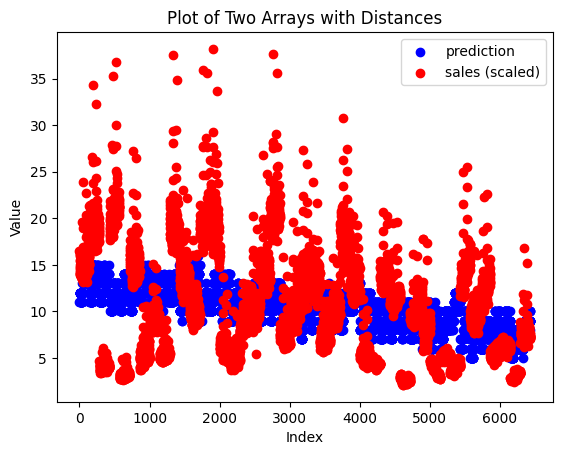

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the points
ax.scatter(range(len(prediction)), prediction, color='blue', label='prediction')
ax.scatter(range(len(y_scaled)), y_scaled, color='red', label='sales (scaled)')

# Set labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title('Plot of Two Arrays with Distances')
ax.legend()

# Show the plot
plt.show()